In [5]:
import pandas as pd 
import geopandas as gpd

In [6]:
foods = gpd.read_file ('data/PPR_Program_Sites.csv')

In [8]:
type (foods)

geopandas.geodataframe.GeoDataFrame

In [11]:
foods.head

<bound method NDFrame.head of                      X                 Y OBJECTID  \
0    -75.1636341891681   40.053862669122        1   
1    -75.0075107483677  40.1228431723608        2   
2    -75.1698319055514  40.0646864811466        3   
3    -75.1747635378688  40.0022212258066        4   
4    -75.1715193626166  39.9421185311373        5   
..                 ...               ...      ...   
217   -75.181715509178  39.9488367380004      218   
218  -75.1869372277938  39.9950086278213      219   
219  -75.1628625968317  39.9727326586703      220   
220  -75.1908126217184  39.9650367191299      221   
221  -75.1191358485831  39.9950303399113      222   

                                   PARK_NAME DPP_ASSET_ID PROGRAM_TYPE  \
0          Awbury Park and Recreation Center          604      PPR_REC   
1    Daniel Boyle Memorial Recreation Center         1843      PPR_REC   
2                Charles M Finley Playground         1989      PPR_REC   
3              James Allen Shuler Pla

In [12]:
foods.tail(1) 

,X,Y,OBJECTID,PARK_NAME,DPP_ASSET_ID,PROGRAM_TYPE,SITE_CLASS,BUILDING,GYM,LABEL_NUMBER,COMMENTS,DATA_SOURCE,geometry
221,-75.1191358485831,39.9950303399113,222,McPherson Square,576,PPR_REC,C,N,N,,,Programs 11/2022,None


In [13]:
foods.tail()

,X,Y,OBJECTID,PARK_NAME,DPP_ASSET_ID,PROGRAM_TYPE,SITE_CLASS,BUILDING,GYM,LABEL_NUMBER,COMMENTS,DATA_SOURCE,geometry
217,-75.181715509178,39.9488367380004,218,Schuylkill River Park,2992,PPR_REC,D,N,N,,Markward is located within this park.,Programs 11/2022,None
218,-75.1869372277938,39.9950086278213,219,Strawberry Mansion Playground,808,PPR_REC,C,N,N,,,Programs 11/2022,None
219,-75.1628625968317,39.9727326586703,220,Stiles Street Play Lot,945,NON_PPR_REC,D,N,N,,,Programs 11/2022,None
220,-75.1908126217184,39.9650367191299,221,33rd and Wallace Playground,1801,PPR_REC,C,Y,N,,,Programs 11/2022,None
221,-75.1191358485831,39.9950303399113,222,McPherson Square,576,PPR_REC,C,N,N,,,Programs 11/2022,None


In [14]:
foods.dtypes

X                 object
Y                 object
OBJECTID          object
PARK_NAME         object
DPP_ASSET_ID      object
PROGRAM_TYPE      object
SITE_CLASS        object
BUILDING          object
GYM               object
LABEL_NUMBER      object
COMMENTS          object
DATA_SOURCE       object
geometry        geometry
dtype: object

In [15]:
foods.shape

(222, 13)

In [16]:
foods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             222 non-null    object  
 1   Y             222 non-null    object  
 2   OBJECTID      222 non-null    object  
 3   PARK_NAME     222 non-null    object  
 4   DPP_ASSET_ID  222 non-null    object  
 5   PROGRAM_TYPE  222 non-null    object  
 6   SITE_CLASS    222 non-null    object  
 7   BUILDING      222 non-null    object  
 8   GYM           222 non-null    object  
 9   LABEL_NUMBER  222 non-null    object  
 10  COMMENTS      222 non-null    object  
 11  DATA_SOURCE   222 non-null    object  
 12  geometry      0 non-null      geometry
dtypes: geometry(1), object(12)
memory usage: 22.7+ KB


In [17]:
foods['PARK_NAME'].sample(5)

15             Thomas I Guerin Recreation Center
73                      Joseph F Vogt Playground
70                  Joseph C McIlvain Playground
56                  Bridesburg Recreation Center
171    East Passyunk Community Recreation Center
Name: PARK_NAME, dtype: object

In [18]:
foods['SITE_CLASS'].sample(5)

179    C
33     B
141    A
219    D
199    C
Name: SITE_CLASS, dtype: object

In [19]:
foods['PROGRAM_TYPE'].sample(5)

35                            PPR_REC
48                            PPR_REC
177                           PPR_REC
183    ENVIRONMENTAL_EDUCATION_CENTER
122                           PPR_REC
Name: PROGRAM_TYPE, dtype: object

In [20]:
foods['PROGRAM_TYPE'].value_counts()

PPR_REC                           202
NON_PPR_REC                         9
OLDER_ADULT_CENTER                  6
ENVIRONMENTAL_EDUCATION_CENTER      3
POOL                                2
Name: PROGRAM_TYPE, dtype: int64

In [21]:
program_count = foods['PROGRAM_TYPE'].value_counts()

In [22]:
type(program_count)

pandas.core.series.Series

In [24]:
program_count = program_count.reset_index()
program_count

,level_0,index,PROGRAM_TYPE
0,0,PPR_REC,202
1,1,NON_PPR_REC,9
2,2,OLDER_ADULT_CENTER,6
3,3,ENVIRONMENTAL_EDUCATION_CENTER,3
4,4,POOL,2


In [25]:
type(program_count)

pandas.core.frame.DataFrame

In [26]:
program_count.columns.to_list()

['level_0', 'index', 'PROGRAM_TYPE']

In [27]:
program_count.columns = ['','program','count']

In [28]:
program_count

,,program,count
0,0,PPR_REC,202
1,1,NON_PPR_REC,9
2,2,OLDER_ADULT_CENTER,6
3,3,ENVIRONMENTAL_EDUCATION_CENTER,3
4,4,POOL,2


<AxesSubplot: >

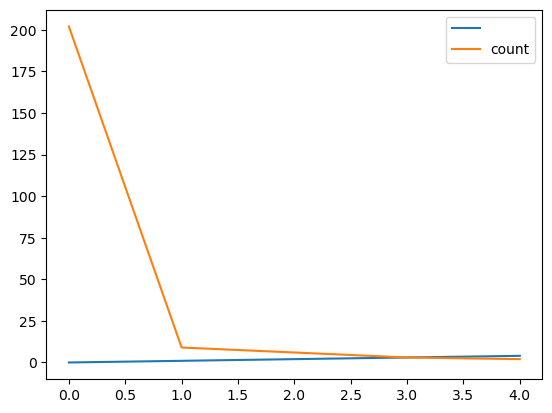

In [29]:
program_count.plot()

<AxesSubplot: xlabel='program'>

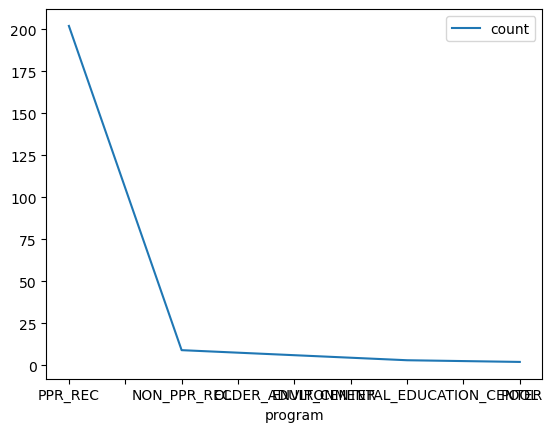

In [30]:
program_count.plot('program','count')

<AxesSubplot: title={'center': 'Number of Programs per Type'}, xlabel='program'>

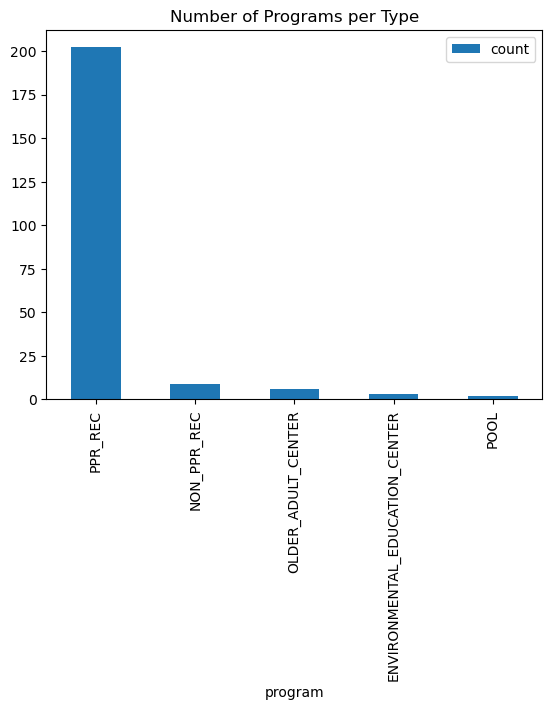

In [31]:
program_count.plot.bar(x = 'program',y = 'count',title = 'Number of Programs per Type')

In [32]:
foods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             222 non-null    object  
 1   Y             222 non-null    object  
 2   OBJECTID      222 non-null    object  
 3   PARK_NAME     222 non-null    object  
 4   DPP_ASSET_ID  222 non-null    object  
 5   PROGRAM_TYPE  222 non-null    object  
 6   SITE_CLASS    222 non-null    object  
 7   BUILDING      222 non-null    object  
 8   GYM           222 non-null    object  
 9   LABEL_NUMBER  222 non-null    object  
 10  COMMENTS      222 non-null    object  
 11  DATA_SOURCE   222 non-null    object  
 12  geometry      0 non-null      geometry
dtypes: geometry(1), object(12)
memory usage: 22.7+ KB


In [33]:
foods[['PARK_NAME','PROGRAM_TYPE','SITE_CLASS','X','Y']]

,PARK_NAME,PROGRAM_TYPE,SITE_CLASS,X,Y
0,Awbury Park and Recreation Center,PPR_REC,B,-75.1636341891681,40.053862669122
1,Daniel Boyle Memorial Recreation Center,PPR_REC,B,-75.0075107483677,40.1228431723608
2,Charles M Finley Playground,PPR_REC,A,-75.1698319055514,40.0646864811466
3,James Allen Shuler Playground,PPR_REC,B,-75.1747635378688,40.0022212258066
4,Marian Anderson Recreation Center,PPR_REC,A,-75.1715193626166,39.9421185311373
...,...,...,...,...,...
217,Schuylkill River Park,PPR_REC,D,-75.181715509178,39.9488367380004
218,Strawberry Mansion Playground,PPR_REC,C,-75.1869372277938,39.9950086278213
219,Stiles Street Play Lot,NON_PPR_REC,D,-75.1628625968317,39.9727326586703
220,33rd and Wallace Playground,PPR_REC,C,-75.1908126217184,39.9650367191299


In [34]:
desired_columns = ['PARK_NAME','PROGRAM_TYPE','SITE_CLASS','X','Y']

In [36]:
foods_trimmed = foods[desired_columns].copy()
foods_trimmed

,PARK_NAME,PROGRAM_TYPE,SITE_CLASS,X,Y
0,Awbury Park and Recreation Center,PPR_REC,B,-75.1636341891681,40.053862669122
1,Daniel Boyle Memorial Recreation Center,PPR_REC,B,-75.0075107483677,40.1228431723608
2,Charles M Finley Playground,PPR_REC,A,-75.1698319055514,40.0646864811466
3,James Allen Shuler Playground,PPR_REC,B,-75.1747635378688,40.0022212258066
4,Marian Anderson Recreation Center,PPR_REC,A,-75.1715193626166,39.9421185311373
...,...,...,...,...,...
217,Schuylkill River Park,PPR_REC,D,-75.181715509178,39.9488367380004
218,Strawberry Mansion Playground,PPR_REC,C,-75.1869372277938,39.9950086278213
219,Stiles Street Play Lot,NON_PPR_REC,D,-75.1628625968317,39.9727326586703
220,33rd and Wallace Playground,PPR_REC,C,-75.1908126217184,39.9650367191299


In [37]:
foods_trimmed[foods_trimmed.PROGRAM_TYPE=='PPR_REC']

,PARK_NAME,PROGRAM_TYPE,SITE_CLASS,X,Y
0,Awbury Park and Recreation Center,PPR_REC,B,-75.1636341891681,40.053862669122
1,Daniel Boyle Memorial Recreation Center,PPR_REC,B,-75.0075107483677,40.1228431723608
2,Charles M Finley Playground,PPR_REC,A,-75.1698319055514,40.0646864811466
3,James Allen Shuler Playground,PPR_REC,B,-75.1747635378688,40.0022212258066
4,Marian Anderson Recreation Center,PPR_REC,A,-75.1715193626166,39.9421185311373
...,...,...,...,...,...
216,Howard McCall Sr Playground,PPR_REC,C,-75.1844942659314,39.9795991272315
217,Schuylkill River Park,PPR_REC,D,-75.181715509178,39.9488367380004
218,Strawberry Mansion Playground,PPR_REC,C,-75.1869372277938,39.9950086278213
220,33rd and Wallace Playground,PPR_REC,C,-75.1908126217184,39.9650367191299


In [39]:
foods_trimmed.plot()

TypeError: no numeric data to plot